<a href="https://colab.research.google.com/github/NishantRoy19/Minor-Project-image-recognition/blob/main/Minor_Project_NR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#preprocessing the Model

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive'
CATEGORIES = ['Helicopters','Tanks']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

#Counting the number of data

<BarContainer object of 2 artists>

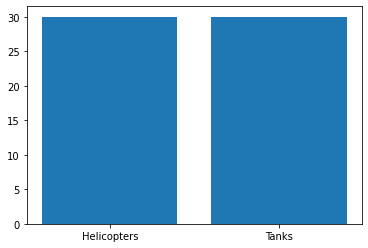

In [14]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

#Split data into traning and testing

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid) 
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#Checking 

In [17]:
y_pred = clf.predict(x_test)
y_pred

y_test

a=0
b=0
for i in range(len(y_test)):
  if y_test[i] == y_pred[i]:
    a=a+1
  else:
    b=b+1
print("out of",len(y_test),a,"matched and",b,"not matched")

out of 18 15 matched and 3 not matched


In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
accuracy_score(y_pred,y_test)

0.8333333333333334

In [20]:
confusion_matrix(y_pred,y_test)

array([[10,  2],
       [ 1,  5]])

#Saving the model

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

In [ ]:
!pip install streamlit
!pip install pyngrok==4.1.1

In [ ]:
from pyngrok import ngrok

In [ ]:
%%writefile app.py
import streamlit as st 
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Image Classifier using ML')
st.text('Upload image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("choose ", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')
  if st.button('PREDICT'):
    CATEGORIES = ['Helicopters','Tanks']
    st.write("result")
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3)) # normalizes
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')

In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url